



## Edilma G. Fields
## Master of Science in Data Science, Grand Canyon University
## UNI – 590: Data science Capstone Project
## November 23, 2022.



## Generate an application to develop and optimize an approach to allow the USA to project/predict having 90% of the country's energy generated predominantly by renewable energy systems.



##Developing the infrastructure necessary that intensify the implementation of renewable energies, has become an addition to the Energy problem, not a solution since all implementations have been limited to infrastructure and not to the implementation of the development of efficient transmitters, collectors, batteries, or the optimization of mechanisms to achieve the effectiveness of the current system of electrical dependency with other factors like:
##According to new research… (Local Renewable Energy Benefits and Resources, 2022).	
###1)	Change the infrastructure of the power companies in the United States!
###2)	Efficiency and Reliability of the new power system
###3)	Space and Environment Protection 
###4)	Evaluate the accessibility of regional renewable resources
###5)	Engage investors, especially regarding siting.


##This application wishes to provide the necessary analysis tools for updating the infrastructures of current energy generation systems, intelligently combining the different methods of producing renewable energy. To guarantee the efficiency and dependability of the new systems, providing the specific figures that must be met, for the implementation of the objective, the information must be tracked until met his projection by 2050.

##Intensify each method of renewable energy generation based on the conditions and potential development of these methods according to the location and the advantages offered by each state of the country, based on the figures provided by each state in the implementation of renewable energies to date, it is intended to make a projection of the number of resources needed to meet the 2050 projection.

##The final objective of this evaluation work is intended to offer an outcoming objective and detailed analysis to motivate investors who wish to enter the renewable energy business and increase the probability of meeting the main projection for 2050.







Data set

##Import necesary lybraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set(style="darkgrid")
from time import time
from collections import Counter
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.metrics import *   
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectKBest
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn import datasets
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.preprocessing import OneHotEncoder

# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  

import os
import sys
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.metrics import f1_score
# Pretty display for notebooks
%matplotlib inline

###Read the Actual data CSV file and display the first 5 Rows

In [3]:
allmydata = pd.read_csv('/content/generation_monthly Aug.csv')
allmydata.head(5)

,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION\n(Megawatthours)
0,2022,1,AK,Total Electric Power Industry,Total,584412
1,2022,1,AK,Total Electric Power Industry,Coal,75088
2,2022,1,AK,Total Electric Power Industry,Hydroelectric Conventional,198901
3,2022,1,AK,Total Electric Power Industry,Natural Gas,214245
4,2022,1,AK,Total Electric Power Industry,Other,-104


In [4]:
allmydata.shape

(16929, 6)

In [5]:
print(allmydata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16929 entries, 0 to 16928
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   YEAR                        16929 non-null  int64 
 1   MONTH                       16929 non-null  int64 
 2   STATE                       16929 non-null  object
 3   TYPE OF PRODUCER            16929 non-null  object
 4   ENERGY SOURCE               16929 non-null  object
 5   GENERATION
(Megawatthours)  16929 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 793.7+ KB
None


###The user selected the state for the project. 

In [6]:
mydata = allmydata[allmydata['STATE'] == 'AZ']
 
print(mydata)

       YEAR  MONTH STATE                         TYPE OF PRODUCER  \
111    2022      1    AZ            Total Electric Power Industry   
112    2022      1    AZ            Total Electric Power Industry   
113    2022      1    AZ            Total Electric Power Industry   
114    2022      1    AZ            Total Electric Power Industry   
115    2022      1    AZ            Total Electric Power Industry   
...     ...    ...   ...                                      ...   
14957  2022      8    AZ  Electric Generators, Electric Utilities   
14958  2022      8    AZ  Electric Generators, Electric Utilities   
14959  2022      8    AZ  Electric Generators, Electric Utilities   
14960  2022      8    AZ  Electric Generators, Electric Utilities   
14961  2022      8    AZ  Electric Generators, Electric Utilities   

                        ENERGY SOURCE  GENERATION\n(Megawatthours)  
111                             Total                      7739230  
112                              

###Data Confirmation information

In [7]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 111 to 14961
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   YEAR                        288 non-null    int64 
 1   MONTH                       288 non-null    int64 
 2   STATE                       288 non-null    object
 3   TYPE OF PRODUCER            288 non-null    object
 4   ENERGY SOURCE               288 non-null    object
 5   GENERATION
(Megawatthours)  288 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.8+ KB


###By Checking the actual data information we have integer 3 columns and 3 String columns

Rename the columns names

In [8]:
mydata.columns = ['YEAR','MONTH','STATE','PRODUCER','ENERGY','GENERATION']
print(mydata.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 111 to 14961
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   YEAR        288 non-null    int64 
 1   MONTH       288 non-null    int64 
 2   STATE       288 non-null    object
 3   PRODUCER    288 non-null    object
 4   ENERGY      288 non-null    object
 5   GENERATION  288 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.8+ KB
None


# Data Clean

Lost data can happen once no data is given for some items or for an entire component. Missing data is a extremely huge problem in a real-life situations.

In order to find missing values we used isna() function and sum to count the NaN values

In [9]:
mydata.isna().sum() 

YEAR          0
MONTH         0
STATE         0
PRODUCER      0
ENERGY        0
GENERATION    0
dtype: int64

## Checking for duplicate cells

In [10]:
mydata.duplicated().sum()

0

Because there is no null values in any of the columns, there is no need to remove or replace the empty cells.

likewise there is no

data in wrong format
duplicate data.

Finding some stadistitics.

In [11]:
mydata['YEAR'].value_counts()

2022    288
Name: YEAR, dtype: int64

This Column "YEAR" only have the current Year

This funtion give us how many of rows are per year sort by count

In [12]:
mydata['STATE'].value_counts()

AZ    288
Name: STATE, dtype: int64

The STATE column only have the state select for the project

Account the rows by Producer in the Data

In [13]:
mydata['PRODUCER'].value_counts()

Total Electric Power Industry                       96
Electric Generators, Electric Utilities             80
Electric Generators, Independent Power Producers    56
Combined Heat and Power, Commercial Power           32
Combined Heat and Power, Electric Power             24
Name: PRODUCER, dtype: int64

This funtion value_counts() Return a list that containing how many of unique values there are in the column PRODUCER. The resulting object will be in descending order so that the first element is the most frequently-occurring ...

# Encoding categorical features like Producer

For the exercise we need to convert string values in a pandas dataframe to a unique integer so that the algorithms can perform better. So we assign unique numeric value to a string value in Pandas DataFrame.

In [14]:
mydata = mydata.replace('Electric Generators, Electric Utilities',1)
mydata = mydata.replace('Combined Heat and Power, Industrial Power', 2)
mydata = mydata.replace('Electric Generators, Independent Power Producers',3)
mydata = mydata.replace('Combined Heat and Power, Commercial Power',4)
mydata = mydata.replace('Combined Heat and Power, Electric Power',5)
mydata = mydata.replace('Total Electric Power Industry',0)

mydata['PRODUCER'].value_counts()

0    96
1    80
3    56
4    32
5    24
Name: PRODUCER, dtype: int64

In [15]:
indexNames = mydata[mydata['PRODUCER'] == 0].index
mydata.drop(indexNames , inplace=True)
mydata['PRODUCER'].value_counts()


1    80
3    56
4    32
5    24
Name: PRODUCER, dtype: int64

In [16]:
print(mydata)

       YEAR  MONTH STATE  PRODUCER                          ENERGY  GENERATION
123    2022      1    AZ         4                           Total       12694
124    2022      1    AZ         4                     Natural Gas       11406
125    2022      1    AZ         4                       Petroleum           1
126    2022      1    AZ         4  Solar Thermal and Photovoltaic        1288
127    2022      1    AZ         5                           Total           0
...     ...    ...   ...       ...                             ...         ...
14957  2022      8    AZ         1                         Nuclear     2930036
14958  2022      8    AZ         1                           Other           0
14959  2022      8    AZ         1                       Petroleum        2123
14960  2022      8    AZ         1  Solar Thermal and Photovoltaic       65040
14961  2022      8    AZ         1                   Other Biomass           0

[192 rows x 6 columns]


### Get indexes the column PRODUCER has value 0
###Delete these row indexes from dataFrame

In [17]:
print(mydata)

       YEAR  MONTH STATE  PRODUCER                          ENERGY  GENERATION
123    2022      1    AZ         4                           Total       12694
124    2022      1    AZ         4                     Natural Gas       11406
125    2022      1    AZ         4                       Petroleum           1
126    2022      1    AZ         4  Solar Thermal and Photovoltaic        1288
127    2022      1    AZ         5                           Total           0
...     ...    ...   ...       ...                             ...         ...
14957  2022      8    AZ         1                         Nuclear     2930036
14958  2022      8    AZ         1                           Other           0
14959  2022      8    AZ         1                       Petroleum        2123
14960  2022      8    AZ         1  Solar Thermal and Photovoltaic       65040
14961  2022      8    AZ         1                   Other Biomass           0

[192 rows x 6 columns]


This funtion value_counts() Return a list that containing how many of unique values there are in the column ENERGY. The resulting object will be in descending order so that the first element is the most frequently-occurring ...

In [18]:
mydata['ENERGY'].value_counts()

Total                             32
Natural Gas                       32
Petroleum                         24
Solar Thermal and Photovoltaic    24
Other                             16
Other Biomass                     16
Wind                               8
Wood and Wood Derived Fuels        8
Coal                               8
Pumped Storage                     8
Hydroelectric Conventional         8
Nuclear                            8
Name: ENERGY, dtype: int64

# Encoding categorical features like Producer
### Replace string with a numerical value, so that the algorithms can perform better.
### Replace all values from the Energy column that equal a specific variable 

In [19]:
mydata = mydata.replace('Natural Gas',1)
mydata = mydata.replace('Petroleum', 2)
mydata = mydata.replace('Coal',3)
mydata = mydata.replace('Other Biomass',4)
mydata = mydata.replace('Hydroelectric Conventional',5)
mydata = mydata.replace('Wood and Wood Derived Fuels',6)
mydata = mydata.replace('Other', 7)
mydata = mydata.replace('Wind',8)
mydata = mydata.replace('Other Gases', 9)
mydata = mydata.replace('Nuclear', 10)
mydata = mydata.replace('Solar Thermal and Photovoltaic', 11)
mydata = mydata.replace('Pumped Storage', 12)
mydata = mydata.replace('Geothermal', 13)
mydata = mydata.replace('Total',0)

mydata['ENERGY'].value_counts()


0     32
1     32
2     24
11    24
7     16
4     16
8      8
6      8
3      8
12     8
5      8
10     8
Name: ENERGY, dtype: int64

###Get indexes the column ENERGY has value 0
###Delete these row indexes from dataFrame

In [20]:
indexNames = mydata[mydata['ENERGY'] == 0].index
mydata.drop(indexNames , inplace=True)
mydata['ENERGY'].value_counts()

1     32
2     24
11    24
7     16
4     16
8      8
6      8
3      8
12     8
5      8
10     8
Name: ENERGY, dtype: int64

In [21]:
print(mydata)

       YEAR  MONTH STATE  PRODUCER  ENERGY  GENERATION
124    2022      1    AZ         4       1       11406
125    2022      1    AZ         4       2           1
126    2022      1    AZ         4      11        1288
128    2022      1    AZ         5       1           0
129    2022      1    AZ         5       2           0
...     ...    ...   ...       ...     ...         ...
14957  2022      8    AZ         1      10     2930036
14958  2022      8    AZ         1       7           0
14959  2022      8    AZ         1       2        2123
14960  2022      8    AZ         1      11       65040
14961  2022      8    AZ         1       4           0

[160 rows x 6 columns]


In [22]:
indexNames = mydata[mydata['GENERATION'] == 0].index
mydata.drop(indexNames , inplace=True)
mydata['GENERATION'].value_counts()

 1          8
 74842      1
-410        1
 2856978    1
 2791699    1
           ..
 526772     1
-654        1
 766110     1
 434        1
 65040      1
Name: GENERATION, Length: 131, dtype: int64

In [23]:
print(mydata)

       YEAR  MONTH STATE  PRODUCER  ENERGY  GENERATION
124    2022      1    AZ         4       1       11406
125    2022      1    AZ         4       2           1
126    2022      1    AZ         4      11        1288
131    2022      1    AZ         3       1      815063
132    2022      1    AZ         3       7        -461
...     ...    ...   ...       ...     ...         ...
14955  2022      8    AZ         1       5      458111
14956  2022      8    AZ         1       1     3564510
14957  2022      8    AZ         1      10     2930036
14959  2022      8    AZ         1       2        2123
14960  2022      8    AZ         1      11       65040

[138 rows x 6 columns]


In [24]:
print(mydata.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 124 to 14960
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   YEAR        138 non-null    int64 
 1   MONTH       138 non-null    int64 
 2   STATE       138 non-null    object
 3   PRODUCER    138 non-null    int64 
 4   ENERGY      138 non-null    int64 
 5   GENERATION  138 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 7.5+ KB
None


### Remove irrelevants columns, in this specific case the column YEAR have only the year 2022, and the state only have the State choose at the begining of the exercise.

Drop a row or observation by condition in this case "total" - 0

In [25]:
mydata.pop('YEAR')

124      2022
125      2022
126      2022
131      2022
132      2022
         ... 
14955    2022
14956    2022
14957    2022
14959    2022
14960    2022
Name: YEAR, Length: 138, dtype: int64

In [26]:
mydata.pop('STATE')

124      AZ
125      AZ
126      AZ
131      AZ
132      AZ
         ..
14955    AZ
14956    AZ
14957    AZ
14959    AZ
14960    AZ
Name: STATE, Length: 138, dtype: object

###Print the data information after remove the columns

In [27]:
print(mydata)

       MONTH  PRODUCER  ENERGY  GENERATION
124        1         4       1       11406
125        1         4       2           1
126        1         4      11        1288
131        1         3       1      815063
132        1         3       7        -461
...      ...       ...     ...         ...
14955      8         1       5      458111
14956      8         1       1     3564510
14957      8         1      10     2930036
14959      8         1       2        2123
14960      8         1      11       65040

[138 rows x 4 columns]


that instruction print the information of the DatFrame, The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [28]:
print(mydata.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 124 to 14960
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   MONTH       138 non-null    int64
 1   PRODUCER    138 non-null    int64
 2   ENERGY      138 non-null    int64
 3   GENERATION  138 non-null    int64
dtypes: int64(4)
memory usage: 5.4 KB
None


Now we have all the columns with integer values to optimize the algorithm. 

###let’s calculate the Variance Inflation Factor (VIF) value. What is VIF, VIF is a number that determines whether a variable has multicollinearity or not. That number also represents how much a variable is inflated because of the linear dependence with other variables.


In [29]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

col = mydata[list(mydata.columns[:4])]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(col.values, i) for i in range(col.shape[1])]
vif_info['Column'] = col.columns
vif_info.sort_values('VIF', ascending=False)


,VIF,Column
0,3.904085,MONTH
1,2.931495,PRODUCER
2,2.357544,ENERGY
3,1.367623,GENERATION


Because the VIF is lower than 5, meaning the dataset does not have a Multicollinearity condition

#Statistical Description

With the describe funtion the exercise summarize the central tendency, dispersion and shape of a dataset’s distribution.

In [30]:
mydata.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTH,138.0,4.492754,2.286892,1.0,3.0,4.5,6.00,8.0
PRODUCER,138.0,2.304348,1.270718,1.0,1.0,3.0,3.00,5.0
ENERGY,138.0,5.884058,3.919021,1.0,2.0,6.0,10.00,12.0
GENERATION,138.0,505872.688406,871348.854913,-12097.0,1726.5,17611.0,617291.25,3564510.0


The diference between the min and the max value for the  Generation column is very notorious, this confirm that the data is very Spread out.

25%, 50% and 75% percentiles the numbers are very spread out.

This describe how many rows are in the dataset

In [31]:
cnt = mydata.count()
print (cnt)

MONTH         138
PRODUCER      138
ENERGY        138
GENERATION    138
dtype: int64


###std or Standar Deviation for the generation is

In [32]:
stdgeneration=mydata['GENERATION'].std() 
print(stdgeneration)

871348.8549130448


In [33]:
minvalue = mydata.min()
  
minvalue

MONTH             1
PRODUCER          1
ENERGY            1
GENERATION   -12097
dtype: int64

Function to calculate IQR for each numerical attribute and show skewness

In [34]:
def detection_outlier(mydatacolumn):
#Calculate Q1, Q3 and IQR
  Q1 = mydatacolumn.quantile(0.25)
  Q3 = mydatacolumn.quantile(0.75)
  print(Q1,Q3)
  IQR = Q3-Q1 #Interquartile range
  print(IQR)
#In general, constant should be 1.
  lower  = Q1-1*IQR
  higher = Q3+1*IQR
#Find number of outliers for specific column
  print('Before data preprocessing:')
  print('Skewness:',mydatacolumn.skew())
  print(mydatacolumn.describe())
  mydatacolumn.loc[(mydatacolumn> higher) | (mydatacolumn< lower)]=mydatacolumn.mean()
  print('After replacing outliers by mean:')
  print('Skewness:',mydatacolumn.skew())
  print('Median:',mydatacolumn.median())
  print('IQR value:',IQR)
  print('Lower,Higher:',lower,',',higher)
  return 

Relations between the numerical columns

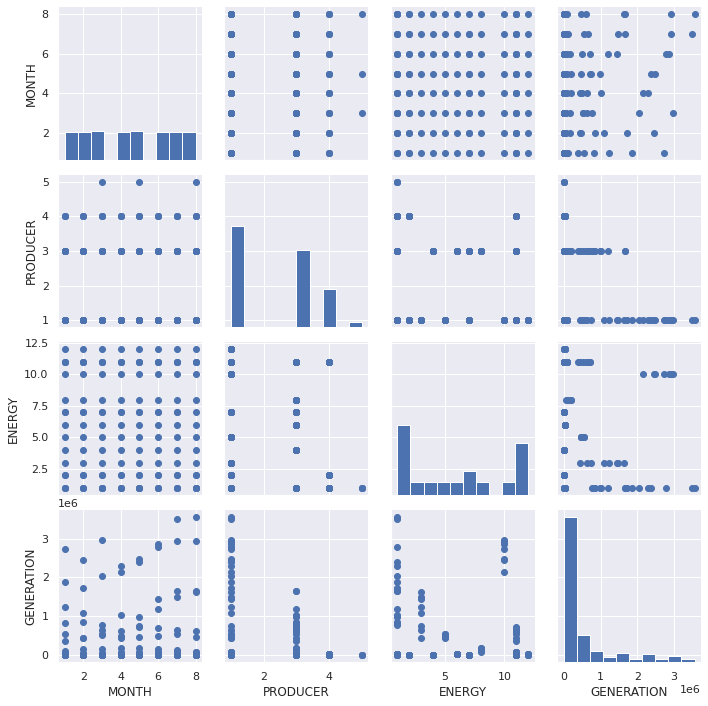

In [35]:
g = sb.PairGrid(data = mydata)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

##Features correlation matrix

##Finding Correlation

In [36]:
mydata.corr()

,MONTH,PRODUCER,ENERGY,GENERATION
MONTH,1.000000,0.028394,-0.013125,0.091625
PRODUCER,0.028394,1.000000,-0.174612,-0.402821
ENERGY,-0.013125,-0.174612,1.000000,-0.114858
GENERATION,0.091625,-0.402821,-0.114858,1.000000


###To have an idea of correlation between our variables we can plot the correlation matrix.

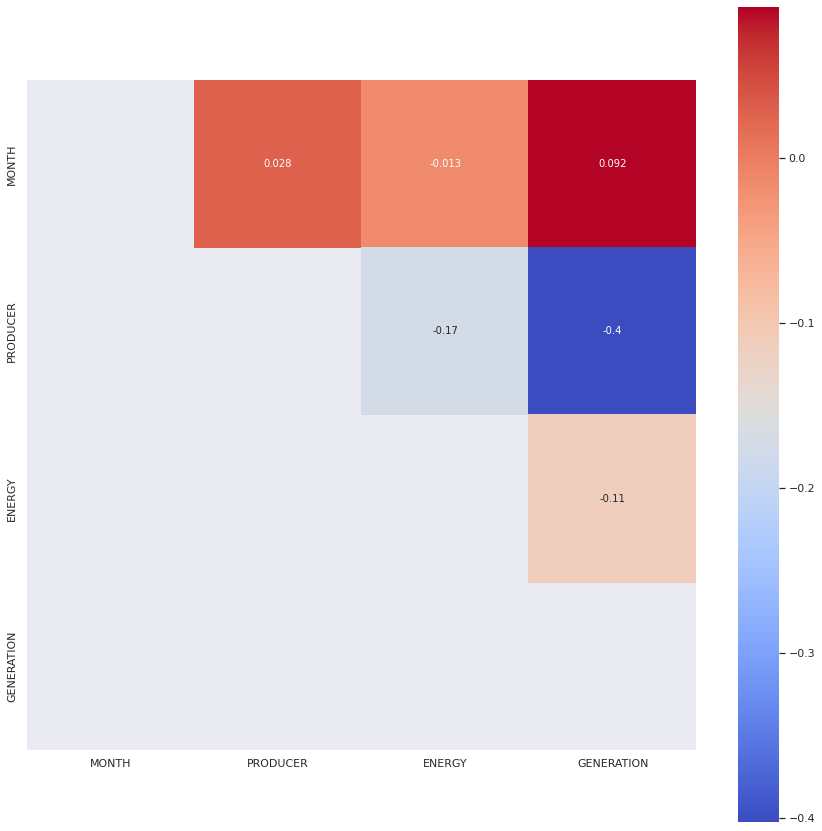

In [37]:
plt.subplots(figsize=(15,15))
matrix = np.tril(mydata.corr())
sns.heatmap(mydata.corr(), annot = True, cmap= 'coolwarm',square=True,mask = matrix)

The Positives number (near to 1)indicates that both variables are proportional, this mean is one value increase the other value increase too. example Montth Vr. Generation 
The Negative number (near to -1.0) indicates a strong negative correlation, i.e., the value of one variable decreases with the others increasing and vice-versa. ENERGY Vs.Month, ENERGY Vs. producer, ENERGY Vs. GENERATION.


Function definitions
Function for checking for outliers in the numeric value columns

In [38]:
def outlier(var):
    high = np.mean(var) + 2*np.std(var)
    low = np.mean(var) - 2*np.std(var)
    outliers = (var >= high) | (var <= low)
    return outliers


Function to bin numerical columns

In [39]:
def bins(X, n): 
    BinWidth = (max(X) - min(X))/n
    bound1 = float('-inf')
    bound2 = min(X) + 1 * BinWidth
    bound3 = min(X) + 2 * BinWidth
    bound4 = float('inf')
    Binned = np.array([" "]*len(X)) 
    Binned[(bound1 < X) & (X <= bound2)] = 1 # Low
    Binned[(bound2 < X) & (X <= bound3)] = 2 # Med
    Binned[(bound3 < X) & (X  < bound4)] = 3 # High
    return Binned

Function for z-standardization of a numerical column

In [40]:
#Scaler
Scaler = MinMaxScaler()
print(Scaler.fit(mydata))
print(Scaler.data_min_)

MinMaxScaler()
[ 1.0000e+00  1.0000e+00  1.0000e+00 -1.2097e+04]


###Mean , Median, Mode for the column Generation is:

In [41]:
from numpy.ma.core import mean
print("Mean of Column Generarion is : % s " % (mean(mydata.GENERATION)))

Mean of Column Generarion is : 505872.6884057971 


In [42]:
from numpy.lib.function_base import median
print("Median of Column Generarion is : % s " % (median(mydata.GENERATION)))

Median of Column Generarion is : 17611.0 


In [43]:
from pandas.core.algorithms import mode
print("Mode of Column Generation is % s" % (mode(mydata.GENERATION)))

Mode of Column Generation is 0    1
dtype: int64


# Data Visualization and Analysis

###Normal Distribution

In [44]:
mu, sigma = 505872.6884057971 , 871348 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
abs(mu - np.mean(s))

842.0751337290858

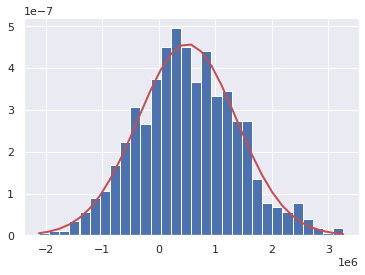

In [45]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

In [46]:
np.random.normal(3, 2.5, size=(2, 4))

array([[ 2.34269962,  1.4883808 ,  5.5297755 , -1.27481729],
       [ 1.08662805,  2.81947811,  5.44650215,  3.75864825]])

Text(0.5, 0, '1 - January      2 - February     3 - March       4 - April\n5 - May     6 - June         7 - July       8 - August')

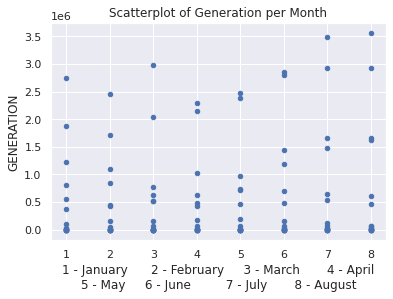

In [47]:
mydata.plot.scatter(x='MONTH', y='GENERATION', title='Scatterplot of Generation per Month');
mydata = mydata.sort_values(by=['GENERATION'], ascending=False)
plt.xlabel("1 - January      2 - February     3 - March       4 - April\n5 - May     6 - June         7 - July       8 - August")


In [48]:
y = mydata['GENERATION'].values.reshape(-1, 1)
X = mydata['ENERGY'].values.reshape(-1, 1)

In [49]:
mydata.columns

Index(['MONTH', 'PRODUCER', 'ENERGY', 'GENERATION'], dtype='object')

Text(0, 0.5, 'count')

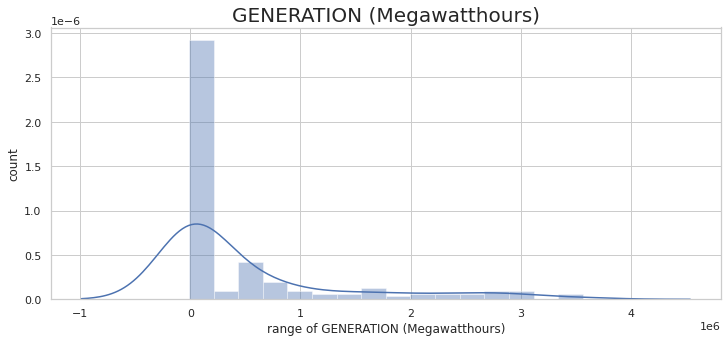

In [50]:
plt.figure(figsize=(12, 5))
sns.set(style = 'whitegrid')
sns.distplot(mydata['GENERATION'])
plt.title('GENERATION (Megawatthours)', fontsize = 20)
plt.xlabel('range of GENERATION (Megawatthours)')
plt.ylabel('count')



Text(6.5, 0, "1 - Electric Generators, Electric Utilities \n2 - Combined Heat'and' Power, Industrial Power \n3 - Electric Generators, Independent Power Producers\n4 - Combined Heat 'and' Power, Commercial Power\n5 - Combined Heat 'and' Power, Electric Power")

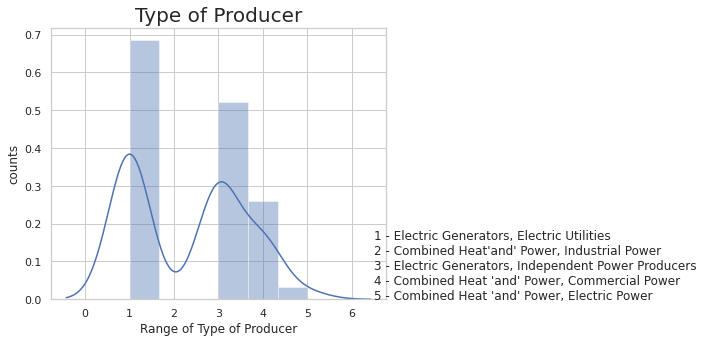

In [51]:
plt.figure(figsize=(6, 5))
sns.set(style = 'whitegrid')
sns.distplot(mydata['PRODUCER'])
plt.title('Type of Producer', fontsize = 20)
plt.xlabel('Range of Type of Producer')
plt.ylabel('counts')
plt.text(6.5,0, "1 - Electric Generators, Electric Utilities \n2 - Combined Heat'and' Power, Industrial Power \n3 - Electric Generators, Independent Power Producers\n4 - Combined Heat 'and' Power, Commercial Power\n5 - Combined Heat 'and' Power, Electric Power")


Text(16, 0, '1 = Natural Gas \n2 = Petroleum \n3 = Coal \n4 = Other Biomass \n5 = Hydroelectric Conventional \n6 = Wood and Wood Derived Fuels \n7 = Other\n8 = Wind \n9 = Other Gasses \n10 = Nuclear \n11 = Solar Thermal and Photovoltaic \n12 = Pumped Storage  \n13 = Geothermal')

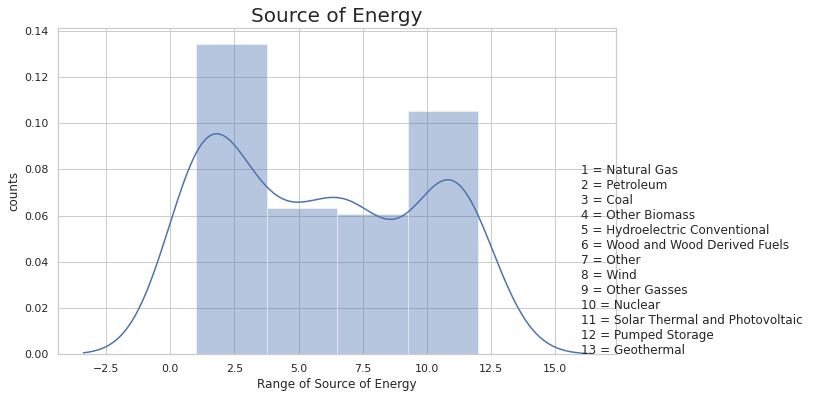

In [52]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(mydata['ENERGY'])
plt.title('Source of Energy', fontsize = 20)
plt.xlabel('Range of Source of Energy')
plt.ylabel('counts')
plt.text(16,0, "1 = Natural Gas \n2 = Petroleum \n3 = Coal \n4 = Other Biomass \n5 = Hydroelectric Conventional \n6 = Wood and Wood Derived Fuels \n7 = Other\n8 = Wind \n9 = Other Gasses \n10 = Nuclear \n11 = Solar Thermal and Photovoltaic \n12 = Pumped Storage  \n13 = Geothermal")

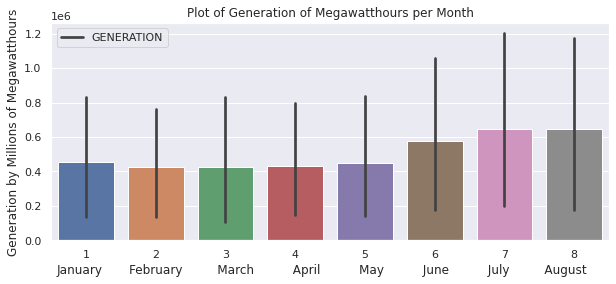

In [53]:
from seaborn.categorical import barplot
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
barplot(x=mydata.MONTH, y=mydata.GENERATION)
plt.title('Plot of Generation of Megawatthours per Month')
plt.ylabel("Generation by Millions of Megawatthours")
plt.xlabel("January       February         March          April          May          June          July         August    ")
plt.legend(labels = ['GENERATION'])

plt.show()

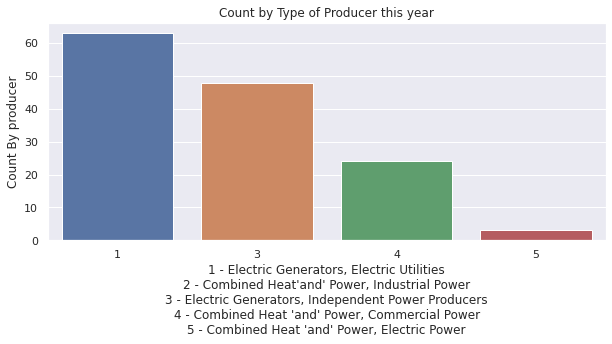

In [54]:
PRODUCER = mydata.PRODUCER.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=PRODUCER.index, y=PRODUCER.values)
plt.title('Count by Type of Producer this year')
plt.ylabel("Count By producer")
plt.xlabel("1 - Electric Generators, Electric Utilities\n2 - Combined Heat'and' Power, Industrial Power\n3 - Electric Generators, Independent Power Producers\n4 - Combined Heat 'and' Power, Commercial Power\n5 - Combined Heat 'and' Power, Electric Power")
plt.show()

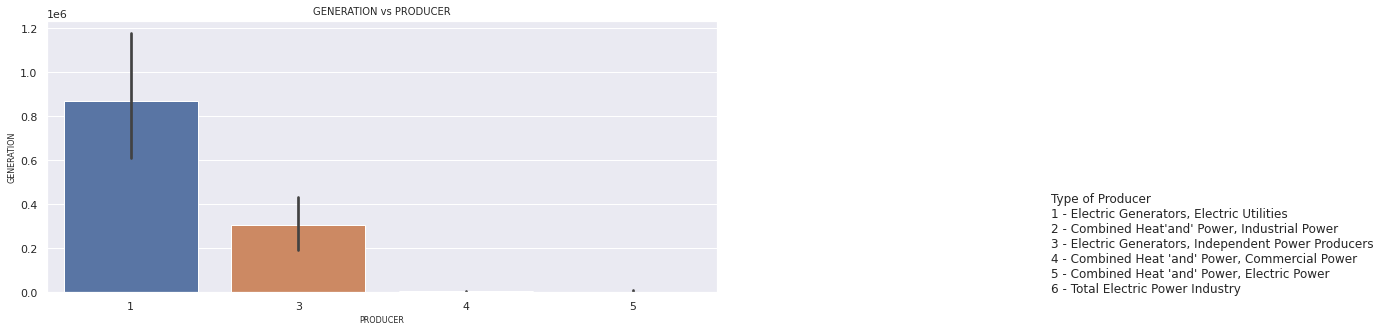

In [55]:
plt.rcParams['figure.figsize'] = (12, 5)
# exit Generation vrs Producer
sns.barplot(x=mydata['PRODUCER'], y=mydata['GENERATION'])
plt.title('GENERATION vs PRODUCER', fontsize = 10)
plt.xlabel('PRODUCER', fontsize = 8)
plt.ylabel('GENERATION', fontsize = 8)
plt.text(5.5,1, "Type of Producer\n1 - Electric Generators, Electric Utilities\n2 - Combined Heat'and' Power, Industrial Power\n3 - Electric Generators, Independent Power Producers\n4 - Combined Heat 'and' Power, Commercial Power\n5 - Combined Heat 'and' Power, Electric Power\n6 - Total Electric Power Industry")
plt.show()


Text(0.5, 0, "1 - Electric Generators, Electric Utilities\n2 - Combined Heat'and' Power, Industrial Power\n3 - Electric Generators, Independent Power Producers\n4 - Combined Heat 'and' Power, Commercial Power\n5 - Combined Heat 'and' Power, Electric Power")

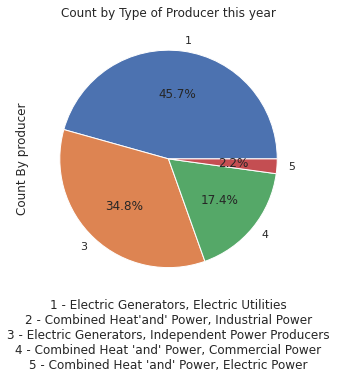

In [56]:
mydata['PRODUCER'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Count by Type of Producer this year')
plt.ylabel("Count By producer")
plt.xlabel("1 - Electric Generators, Electric Utilities\n2 - Combined Heat'and' Power, Industrial Power\n3 - Electric Generators, Independent Power Producers\n4 - Combined Heat 'and' Power, Commercial Power\n5 - Combined Heat 'and' Power, Electric Power")


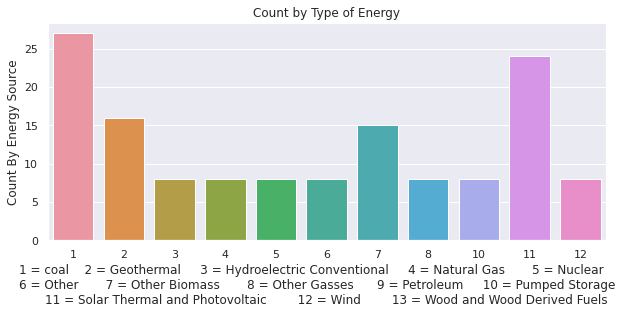

In [57]:
ENERGY = mydata.ENERGY.value_counts()
indexNames = mydata[mydata['ENERGY'] == 0].index
mydata = mydata.sort_values(by=['ENERGY'], ascending=False)
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=ENERGY.index, y=ENERGY.values)
plt.title('Count by Type of Energy')
plt.xlabel("1 = coal    2 = Geothermal     3 = Hydroelectric Conventional     4 = Natural Gas       5 = Nuclear        \n6 = Other       7 = Other Biomass       8 = Other Gasses      9 = Petroleum     10 = Pumped Storage     \n11 = Solar Thermal and Photovoltaic        12 = Wind        13 = Wood and Wood Derived Fuels")
plt.ylabel("Count By Energy Source")

plt.show()

Text(0.5, 0, '1 = Coal    2 = Geothermal     3 = Hydroelectric Conventional     4 = Natural Gas       \n5 = Nuclear        6 = Other       7 = Other Biomass       8 = Other Gasses\n      9 = Petroleum    10 = Pumped Storage      11 = Solar Thermal and Photovoltaic\n        12 = Wind        13 = Wood and Wood Derived Fuels')

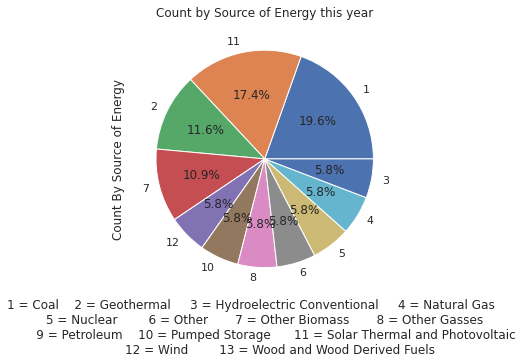

In [58]:
mydata['ENERGY'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Count by Source of Energy this year')
plt.ylabel("Count By Source of Energy")
plt.xlabel("1 = Coal    2 = Geothermal     3 = Hydroelectric Conventional     4 = Natural Gas       \n5 = Nuclear        6 = Other       7 = Other Biomass       8 = Other Gasses\n      9 = Petroleum    10 = Pumped Storage      11 = Solar Thermal and Photovoltaic\n        12 = Wind        13 = Wood and Wood Derived Fuels")


In [59]:
indexNames = mydata[mydata['ENERGY'] == 0].index
mydata.drop(indexNames , inplace=True)
mydata['ENERGY'].value_counts()

1     27
11    24
2     16
7     15
12     8
10     8
8      8
6      8
5      8
4      8
3      8
Name: ENERGY, dtype: int64

In [60]:
mydata.info

<bound method DataFrame.info of        MONTH  PRODUCER  ENERGY  GENERATION
139        1         1      12      -12097
2258       2         1      12       -9572
4376       3         1      12       -9381
8609       5         1      12       13044
6493       4         1      12        8884
...      ...       ...     ...         ...
124        1         4       1       11406
10710      6         4       1       11809
12824      7         4       1       12918
14939      8         4       1       13271
14956      8         1       1     3564510

[138 rows x 4 columns]>

##Observing Correlation between features of the Dataset

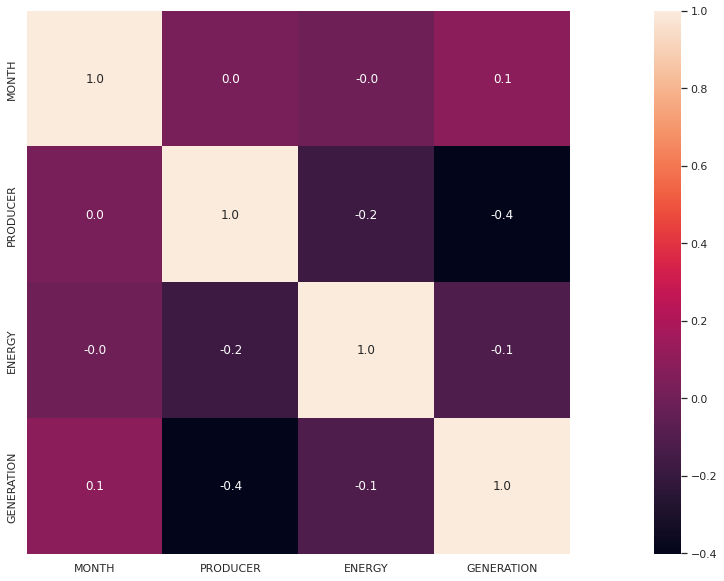

In [61]:
correlation = mydata.corr()
plt.subplots(figsize=(30,10))
sns.heatmap( correlation, square=True, annot=True, fmt=".1f" )  

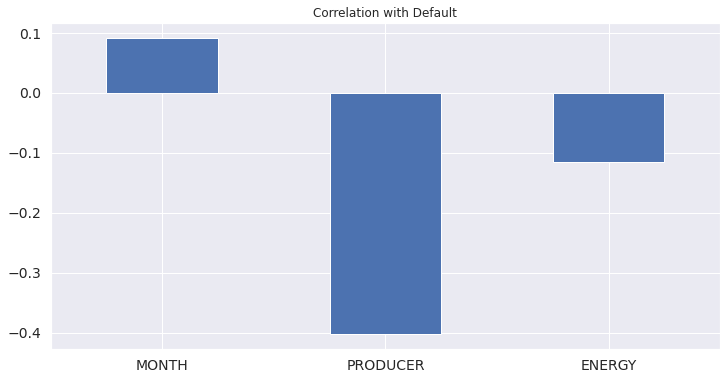

In [62]:
X = mydata.drop(['GENERATION'],axis=1)
X.corrwith(mydata['GENERATION']).plot.bar(figsize = (12, 6), title = "Correlation with Default", 
                                        fontsize = 14,rot = 0, grid = True)

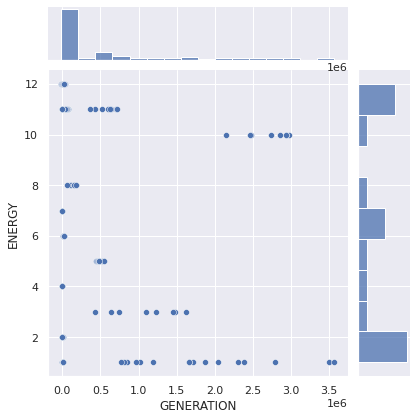

In [63]:
sns.jointplot(x='GENERATION',y='ENERGY',data=mydata,kind="scatter")

Text(0.5, 0, '1 - January      2 - February     3 - March       4 - April\n5 - May     6 - June         7 - July       8 - August')

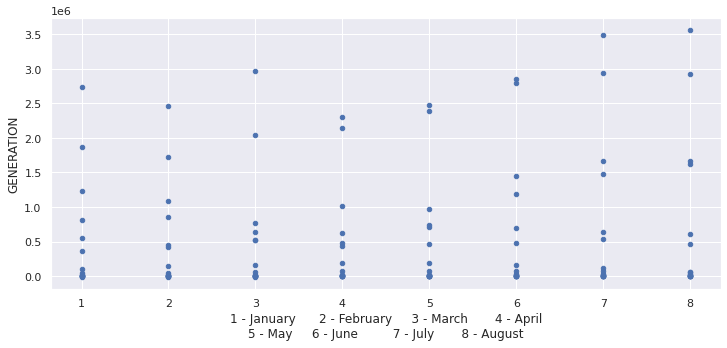

In [64]:
mydata.plot(x = 'MONTH', y = 'GENERATION', kind='scatter')
plt.xlabel("1 - January      2 - February     3 - March       4 - April\n5 - May     6 - June         7 - July       8 - August")

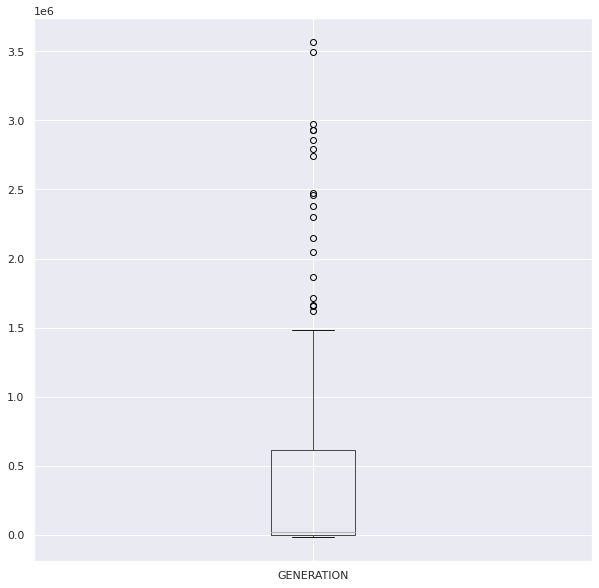

In [65]:
boxplot = mydata.boxplot(column="GENERATION", figsize=(10,10))

the Energy Generation was plot to get a sense of the data.

In [66]:
mydata.corr()

,MONTH,PRODUCER,ENERGY,GENERATION
MONTH,1.000000,0.028394,-0.013125,0.091625
PRODUCER,0.028394,1.000000,-0.174612,-0.402821
ENERGY,-0.013125,-0.174612,1.000000,-0.114858
GENERATION,0.091625,-0.402821,-0.114858,1.000000


In [67]:
print(mydata)

       MONTH  PRODUCER  ENERGY  GENERATION
139        1         1      12      -12097
2258       2         1      12       -9572
4376       3         1      12       -9381
8609       5         1      12       13044
6493       4         1      12        8884
...      ...       ...     ...         ...
124        1         4       1       11406
10710      6         4       1       11809
12824      7         4       1       12918
14939      8         4       1       13271
14956      8         1       1     3564510

[138 rows x 4 columns]


Normalize values for the numerical columns by z-standardization

Normalize the GENERATION column; plot the normalized GENERATION data.

In [68]:
normalized_mydata=(mydata-mydata.mean())/mydata.std()

In [69]:
mydata.head(5)

,MONTH,PRODUCER,ENERGY,GENERATION
139,1,1,12,-12097
2258,2,1,12,-9572
4376,3,1,12,-9381
8609,5,1,12,13044
6493,4,1,12,8884


Text(0.5, 0, '1 - January           2 - February            3 - March              4 - April     \n  5 - May                 6 - June                7 - July                 8 - August')

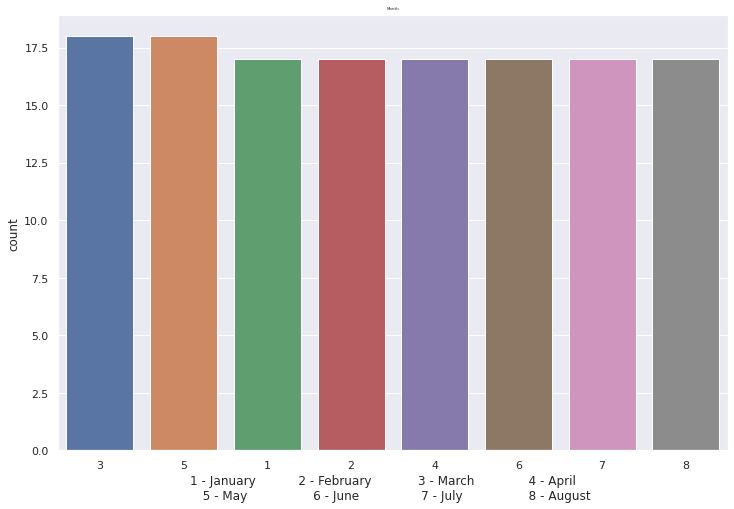

In [70]:
plt.figure(figsize=(12, 8))
sns.countplot(mydata.MONTH.dropna(), order = mydata.MONTH.value_counts().index);
plt.title('Month', fontsize = 4)
plt.xlabel("1 - January           2 - February            3 - March              4 - April     \n  5 - May                 6 - June                7 - July                 8 - August")


###Generation of Energy by month
###Generation by source of Energy

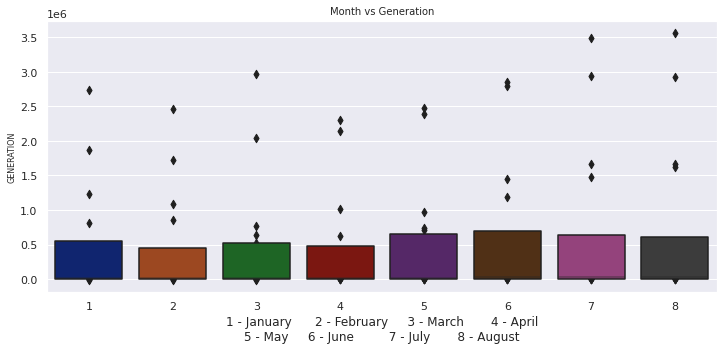

In [71]:
plt.rcParams['figure.figsize'] = (12, 5)
# exit Generation vrs Month
sns.boxenplot(mydata['MONTH'], mydata['GENERATION'], palette = 'dark')
plt.title('Month vs Generation', fontsize = 10)
plt.xlabel("1 - January      2 - February     3 - March       4 - April\n5 - May     6 - June         7 - July       8 - August")
plt.ylabel('GENERATION', fontsize = 8)
plt.show()

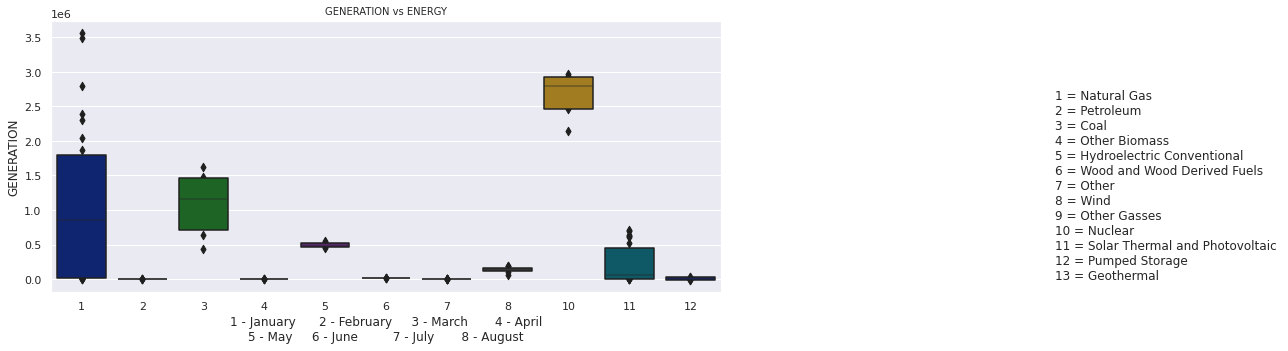

In [72]:
plt.rcParams['figure.figsize'] = (12, 5)
# exit Generation vrs Energy
sns.boxenplot(mydata['ENERGY'], mydata['GENERATION'], palette = 'dark')
plt.title('GENERATION vs ENERGY', fontsize = 10)
plt.xlabel("1 - January      2 - February     3 - March       4 - April\n5 - May     6 - June         7 - July       8 - August")
plt.text(16,0, "1 = Natural Gas \n2 = Petroleum \n3 = Coal \n4 = Other Biomass \n5 = Hydroelectric Conventional \n6 = Wood and Wood Derived Fuels \n7 = Other\n8 = Wind \n9 = Other Gasses \n10 = Nuclear \n11 = Solar Thermal and Photovoltaic \n12 = Pumped Storage  \n13 = Geothermal")

plt.show()

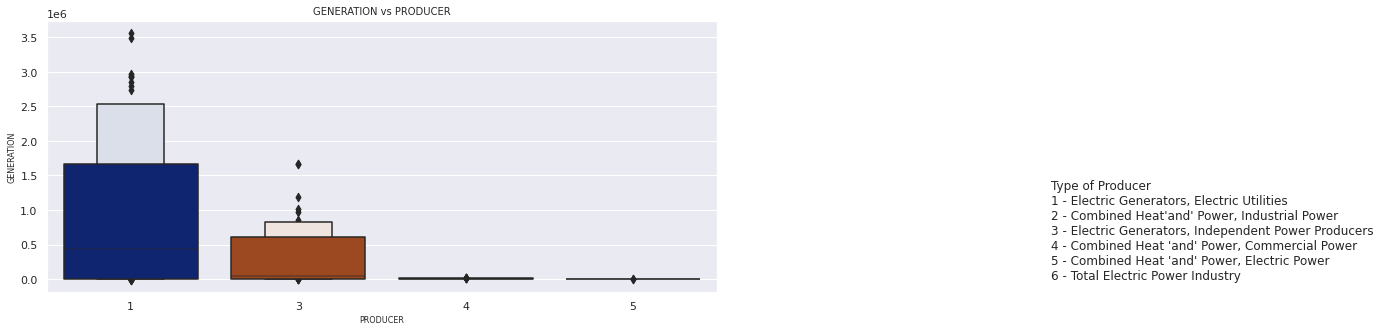

In [73]:
plt.rcParams['figure.figsize'] = (12, 5)
# exit Generation vrs Producer
sns.boxenplot(mydata['PRODUCER'], mydata['GENERATION'], palette = 'dark')
plt.title('GENERATION vs PRODUCER', fontsize = 10)
plt.xlabel('PRODUCER', fontsize = 8)
plt.ylabel('GENERATION', fontsize = 8)
plt.text(5.5,1, "Type of Producer\n1 - Electric Generators, Electric Utilities\n2 - Combined Heat'and' Power, Industrial Power\n3 - Electric Generators, Independent Power Producers\n4 - Combined Heat 'and' Power, Commercial Power\n5 - Combined Heat 'and' Power, Electric Power\n6 - Total Electric Power Industry")
plt.show()

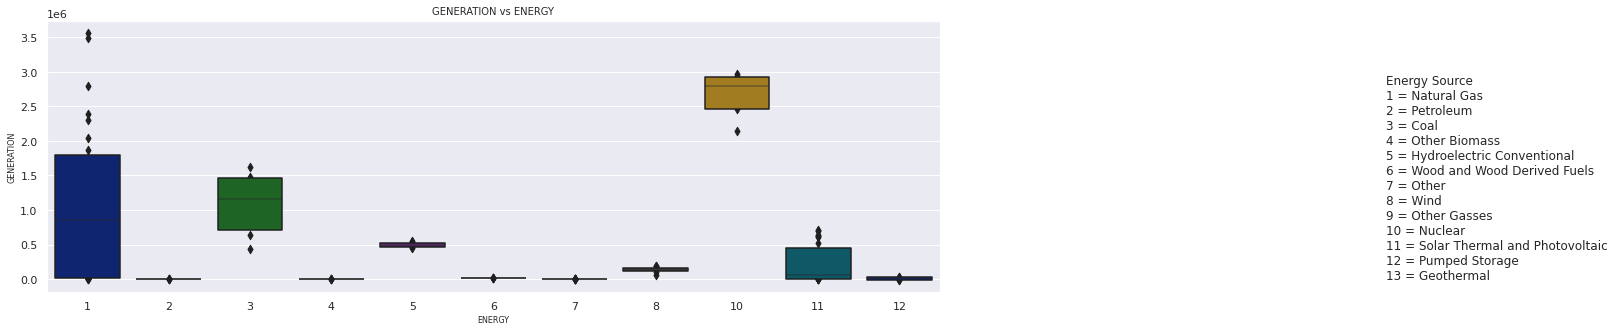

In [74]:
plt.rcParams['figure.figsize'] = (16, 5)
# exit Generation vrs Energy
sns.boxenplot(mydata['ENERGY'], mydata['GENERATION'], palette = 'dark')
plt.title('GENERATION vs ENERGY', fontsize = 10)
plt.xlabel('ENERGY', fontsize = 8)
plt.ylabel('GENERATION', fontsize = 8)
plt.text(16,0, "Energy Source\n1 = Natural Gas \n2 = Petroleum \n3 = Coal \n4 = Other Biomass \n5 = Hydroelectric Conventional \n6 = Wood and Wood Derived Fuels \n7 = Other\n8 = Wind \n9 = Other Gasses \n10 = Nuclear \n11 = Solar Thermal and Photovoltaic \n12 = Pumped Storage  \n13 = Geothermal")
plt.show()

The violin plot is showing us the different pattern for each Energy type. This may come from the definition of the PageValue, which gives a value close to 0 to pages which did not Show a lot of Generation. 

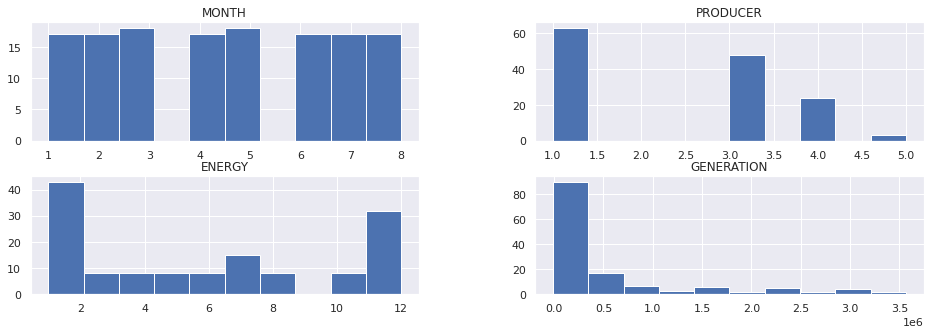

In [75]:
from matplotlib import pyplot
mydata.hist()
pyplot.show()

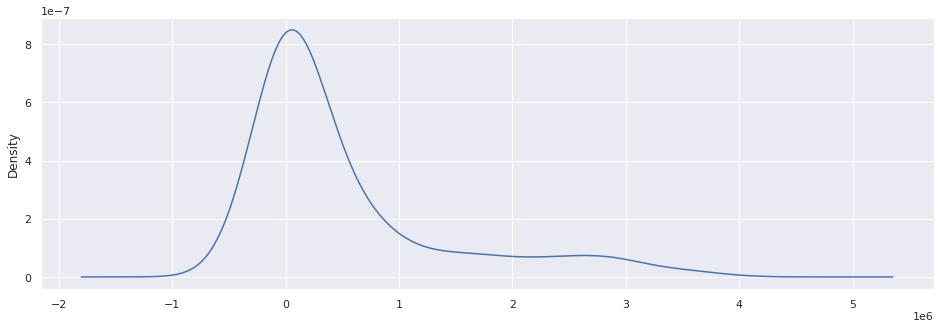

In [76]:
mydata.GENERATION.plot(kind='kde')
pyplot.show()

In [77]:
mydata = mydata.sort_values(by=['GENERATION'], ascending=False)

In [78]:
print(mydata.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 14956 to 139
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   MONTH       138 non-null    int64
 1   PRODUCER    138 non-null    int64
 2   ENERGY      138 non-null    int64
 3   GENERATION  138 non-null    int64
dtypes: int64(4)
memory usage: 5.4 KB
None


Define X & y

In [79]:
X = mydata.iloc[:,:-1]
y = mydata['GENERATION']
print(X.shape, y.shape)


(138, 3) (138,)


In [80]:
X

,MONTH,PRODUCER,ENERGY
14956,8,1,1
12841,7,1,1
4379,3,1,10
12842,7,1,10
14957,8,1,10
...,...,...,...
12832,7,3,7
14947,8,3,7
4376,3,1,12
2258,2,1,12


In [81]:
y

14956    3564510
12841    3492803
4379     2972667
12842    2933199
14957    2930036
          ...   
12832       -803
14947      -1287
4376       -9381
2258       -9572
139       -12097
Name: GENERATION, Length: 138, dtype: int64

##Spiliting Dataset into training(75%) and test set(25%)

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)

X_train.shape

(103, 3)

###The split Data results

In [83]:
X_train

,MONTH,PRODUCER,ENERGY
2245,2,4,11
8603,5,3,11
2264,2,1,11
12826,7,4,11
4376,3,1,12
...,...,...,...
2261,2,1,10
4371,3,3,4
4373,3,3,6
2244,2,4,2


In [84]:
y_train

2245        1467
8603      717257
2264       44827
12826       2964
4376       -9381
          ...   
2261     2459415
4371        1721
4373       21128
2244           1
133       368534
Name: GENERATION, Length: 103, dtype: int64

In [85]:
X_test

,MONTH,PRODUCER,ENERGY
8612,5,1,10
12836,7,3,6
131,1,3,1
12825,7,4,2
6485,4,3,1
6492,4,1,3
8609,5,1,12
136,1,3,6
4380,3,1,7
4375,3,1,3


In [86]:
y_test

8612     2472513
12836      18332
131       815063
12825          1
6485     1021059
6492      433399
8609       13044
136        14502
4380        -298
4375      634281
2258       -9572
2250      852682
134         1774
10730       2594
145        39202
8598         654
10721     156212
10717    1190523
8596        2348
8605      185836
4362           1
14950      62940
14953    1622877
2253        1624
4372      155608
6480        2093
14955     458111
142      2738935
12831    1660724
2259      448734
8611     2383675
4379     2972667
135       106278
14947      -1287
12844       6602
Name: GENERATION, dtype: int64

In [87]:
import statsmodels.api as sm
import pandas as pd
 

# defining the variables
X = mydata['ENERGY'].tolist()
y = mydata['GENERATION'].tolist()
 
# adding the constant term
X = sm.add_constant(X)
 
# performing the regression
# and fitting the model
result = sm.OLS(y, X).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.818
Date:                Tue, 29 Nov 2022   Prob (F-statistic):              0.180
Time:                        17:05:31   Log-Likelihood:                -2081.9
No. Observations:                 138   AIC:                             4168.
Df Residuals:                     136   BIC:                             4174.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.561e+05   1.34e+05      4.906      0.0

In [88]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(model)

DecisionTreeClassifier()


In [89]:
# Model
cart_model = DecisionTreeClassifier(random_state=17).fit(X, y)

In [90]:
#y_pred for Confusion Matrix  :
y_pred = cart_model.predict(X)

In [91]:
#y_prob for AUC:
y_prob = cart_model.predict_proba(X)[:, 1]

In [92]:
# Confusion matrix
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

      -12097       0.12      1.00      0.22         1
       -9572       0.00      0.00      0.00         1
       -9381       0.00      0.00      0.00         1
       -1287       0.07      1.00      0.12         1
        -803       0.00      0.00      0.00         1
        -654       0.00      0.00      0.00         1
        -627       0.00      0.00      0.00         1
        -559       0.00      0.00      0.00         1
        -482       0.00      0.00      0.00         1
        -461       0.00      0.00      0.00         1
        -428       0.00      0.00      0.00         1
        -410       0.00      0.00      0.00         1
        -392       0.00      0.00      0.00         1
        -370       0.00      0.00      0.00         1
        -351       0.00      0.00      0.00         1
        -298       0.00      0.00      0.00         1
        -201       0.00      0.00      0.00         1
        -173       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [93]:
expected_y  = y_test
predicted_y = model.predict(X_test)

In [94]:
from sklearn import metrics
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

      -12097       0.00      0.00      0.00         0
       -9572       0.00      0.00      0.00         1
       -1287       0.00      0.00      0.00         1
        -803       0.00      0.00      0.00         0
        -461       0.00      0.00      0.00         0
        -298       0.00      0.00      0.00         1
        -201       0.00      0.00      0.00         0
           1       1.00      1.00      1.00         2
         434       0.00      0.00      0.00         0
         654       0.00      0.00      0.00         1
        1624       0.00      0.00      0.00         1
        1721       0.00      0.00      0.00         0
        1774       0.00      0.00      0.00         1
        1861       0.00      0.00      0.00         0
        2093       0.00      0.00      0.00         1
        2123       0.00      0.00      0.00         0
        2348       0.00      0.00      0.00         1
        2594       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

#Principal Component Analysis
We can use principal component analysis to see if we can have a good representation of our dataset in two or three dimensions.

[0.70233248 0.22652496 0.07114256]


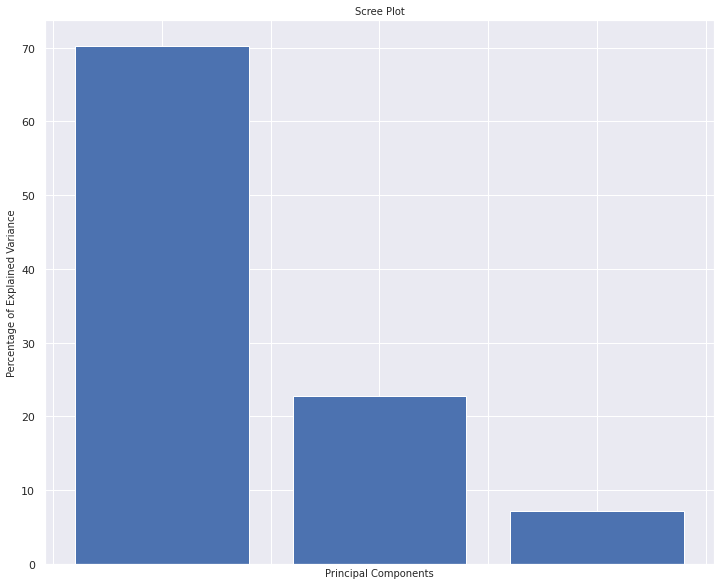

In [95]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
print(pca.explained_variance_ratio_)
plt.rcParams['figure.figsize'] = (12, 10)
font=10
plt.bar(x=range(1,len(per_var)+1),height=per_var)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.ylabel('Percentage of Explained Variance', fontsize = font)
plt.xlabel('Principal Components', fontsize = font)
plt.title('Scree Plot', fontsize = font)
plt.show()

Because the percentage of explained variance decay slowly, it is not possible to represent well our dataset in two or three dimensions.
2D PCA Plot
We can have a look at our dataset in a 2D Plot.

##Building ML Model
#Overview of a few model's performance

Let's compare a few algorithms that can be used for classification to see the performance of each ones.

Applying Machine Learning Algorithm for Classification Problem
Logistic Regression
In Logistic Regression, we wish to model a dependent variable(Y) in terms of one or more independent variables(X). It is a method for classification. This algorithm is used for the dependent variable that is Categorical. Y is modeled using a function that gives output between 0 and 1 for all values of X. In Logistic Regression, the Sigmoid (aka Logistic) Function is used

Naive Bayes 
 Accuracy: 0.05714285714285714 
 fscore 0.05714285714285714


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Logistic Regression 
 Accuracy: 0.05714285714285714 
 fscore 0.022857142857142857
K Nearest Neighbor 
 Accuracy: 0.05714285714285714 
 fscore 0.01904761904761905
Support Vector Classification 
 Accuracy: 0.05714285714285714 
 fscore 0.01038961038961039
Decision Tree Classification 
 Accuracy: 0.05714285714285714 
 fscore 0.05714285714285714
Stochastic Gradient Descent 
 Accuracy: 0.0 
 fscore 0.0
Linear Discriminant Analysis 
 Accuracy: 0.05714285714285714 
 fscore 0.006177606177606178
Gradient Boosting Classification  
 Accuracy: 0.05714285714285714 
 fscore 0.05714285714285714
Random Forest Classification 
 Accuracy: 0.05714285714285714 
 fscore 0.05714285714285714


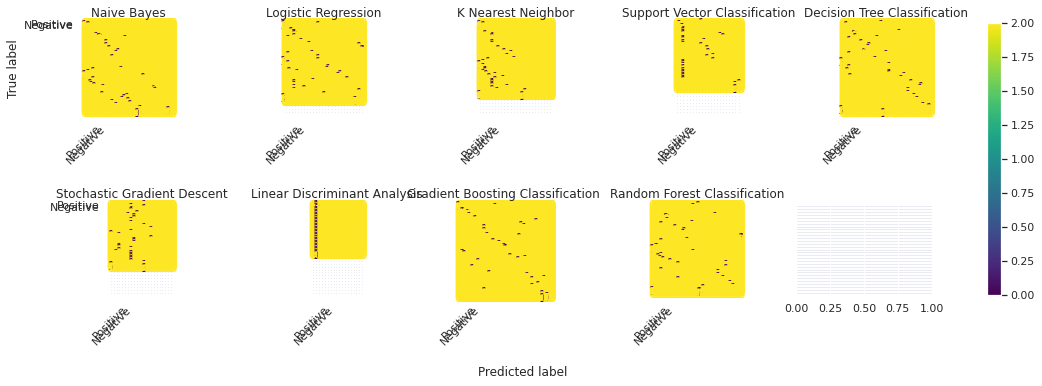

In [96]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import f1_score

classifiers = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "K Nearest Neighbor": KNeighborsClassifier(),
    "Support Vector Classification": SVC(),
    "Decision Tree Classification": DecisionTreeClassifier(),
    "Stochastic Gradient Descent": SGDClassifier(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Gradient Boosting Classification ": GradientBoostingClassifier(),
    "Random Forest Classification": RandomForestClassifier()
    }

f, axes = plt.subplots(2, 5, figsize=(20, 5), sharey='row')

for i, (key, classifier) in enumerate(classifiers.items()):
    j = 0
    k = i
    if i>4:
        k = i-5
        j+=1
    
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    print(key, "\n Accuracy:",accuracy_score(y_test,y_pred, normalize=True),"\n fscore",f1_score(y_test,y_pred, average='weighted'))
    disp = ConfusionMatrixDisplay(cf_matrix,display_labels=["Positive", "Negative"])
    disp.plot(ax=axes[j][k], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.43, -0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=1)


f.colorbar(disp.im_, ax=axes)

plt.show()

In [97]:
#
# Average is assigned micro
#
precisionScore_sklearn_microavg = precision_score(y_test, y_pred, average='micro')
#
# Average is assigned macro
#
precisionScore_sklearn_macroavg = precision_score(y_test, y_pred, average='macro')

# Average is assigned weighted
#
precisionScore_sklearn_weighted = precision_score(y_test, y_pred, average='weighted')
#
# Printing micro and macro average precision score
#
precisionScore_sklearn_microavg, precisionScore_sklearn_macroavg, precisionScore_sklearn_weighted


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.05714285714285714, 0.01694915254237288, 0.05714285714285714)

##Bivariate analysis

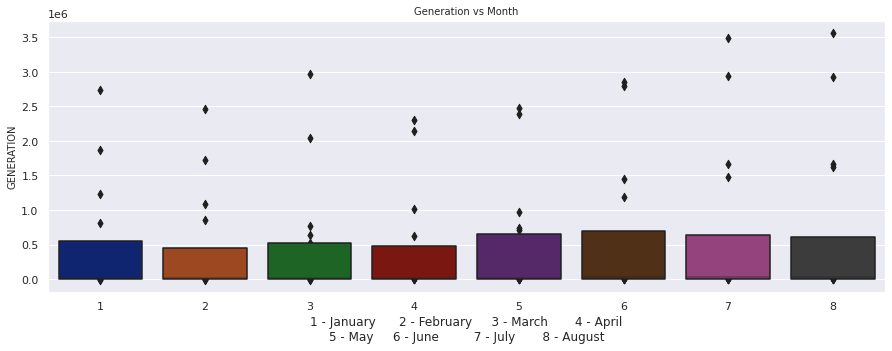

In [98]:
plt.rcParams['figure.figsize'] = (15, 5)
# exit rate vs raevenue
sns.boxenplot(mydata['MONTH'], mydata['GENERATION'], palette = 'dark')
plt.title('Generation vs Month', fontsize = 10)
plt.xlabel("1 - January      2 - February     3 - March       4 - April\n5 - May     6 - June         7 - July       8 - August")
plt.ylabel('GENERATION', fontsize = 10)

plt.show()

The fisrt 5 months of the year the Generation is large that the June, July and August